# Assignment 1

## Part 1: Visualizing patterns in the data

In [2]:
import pandas as pd

data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

### Plot that captures the development of focus crimes across weekdays:

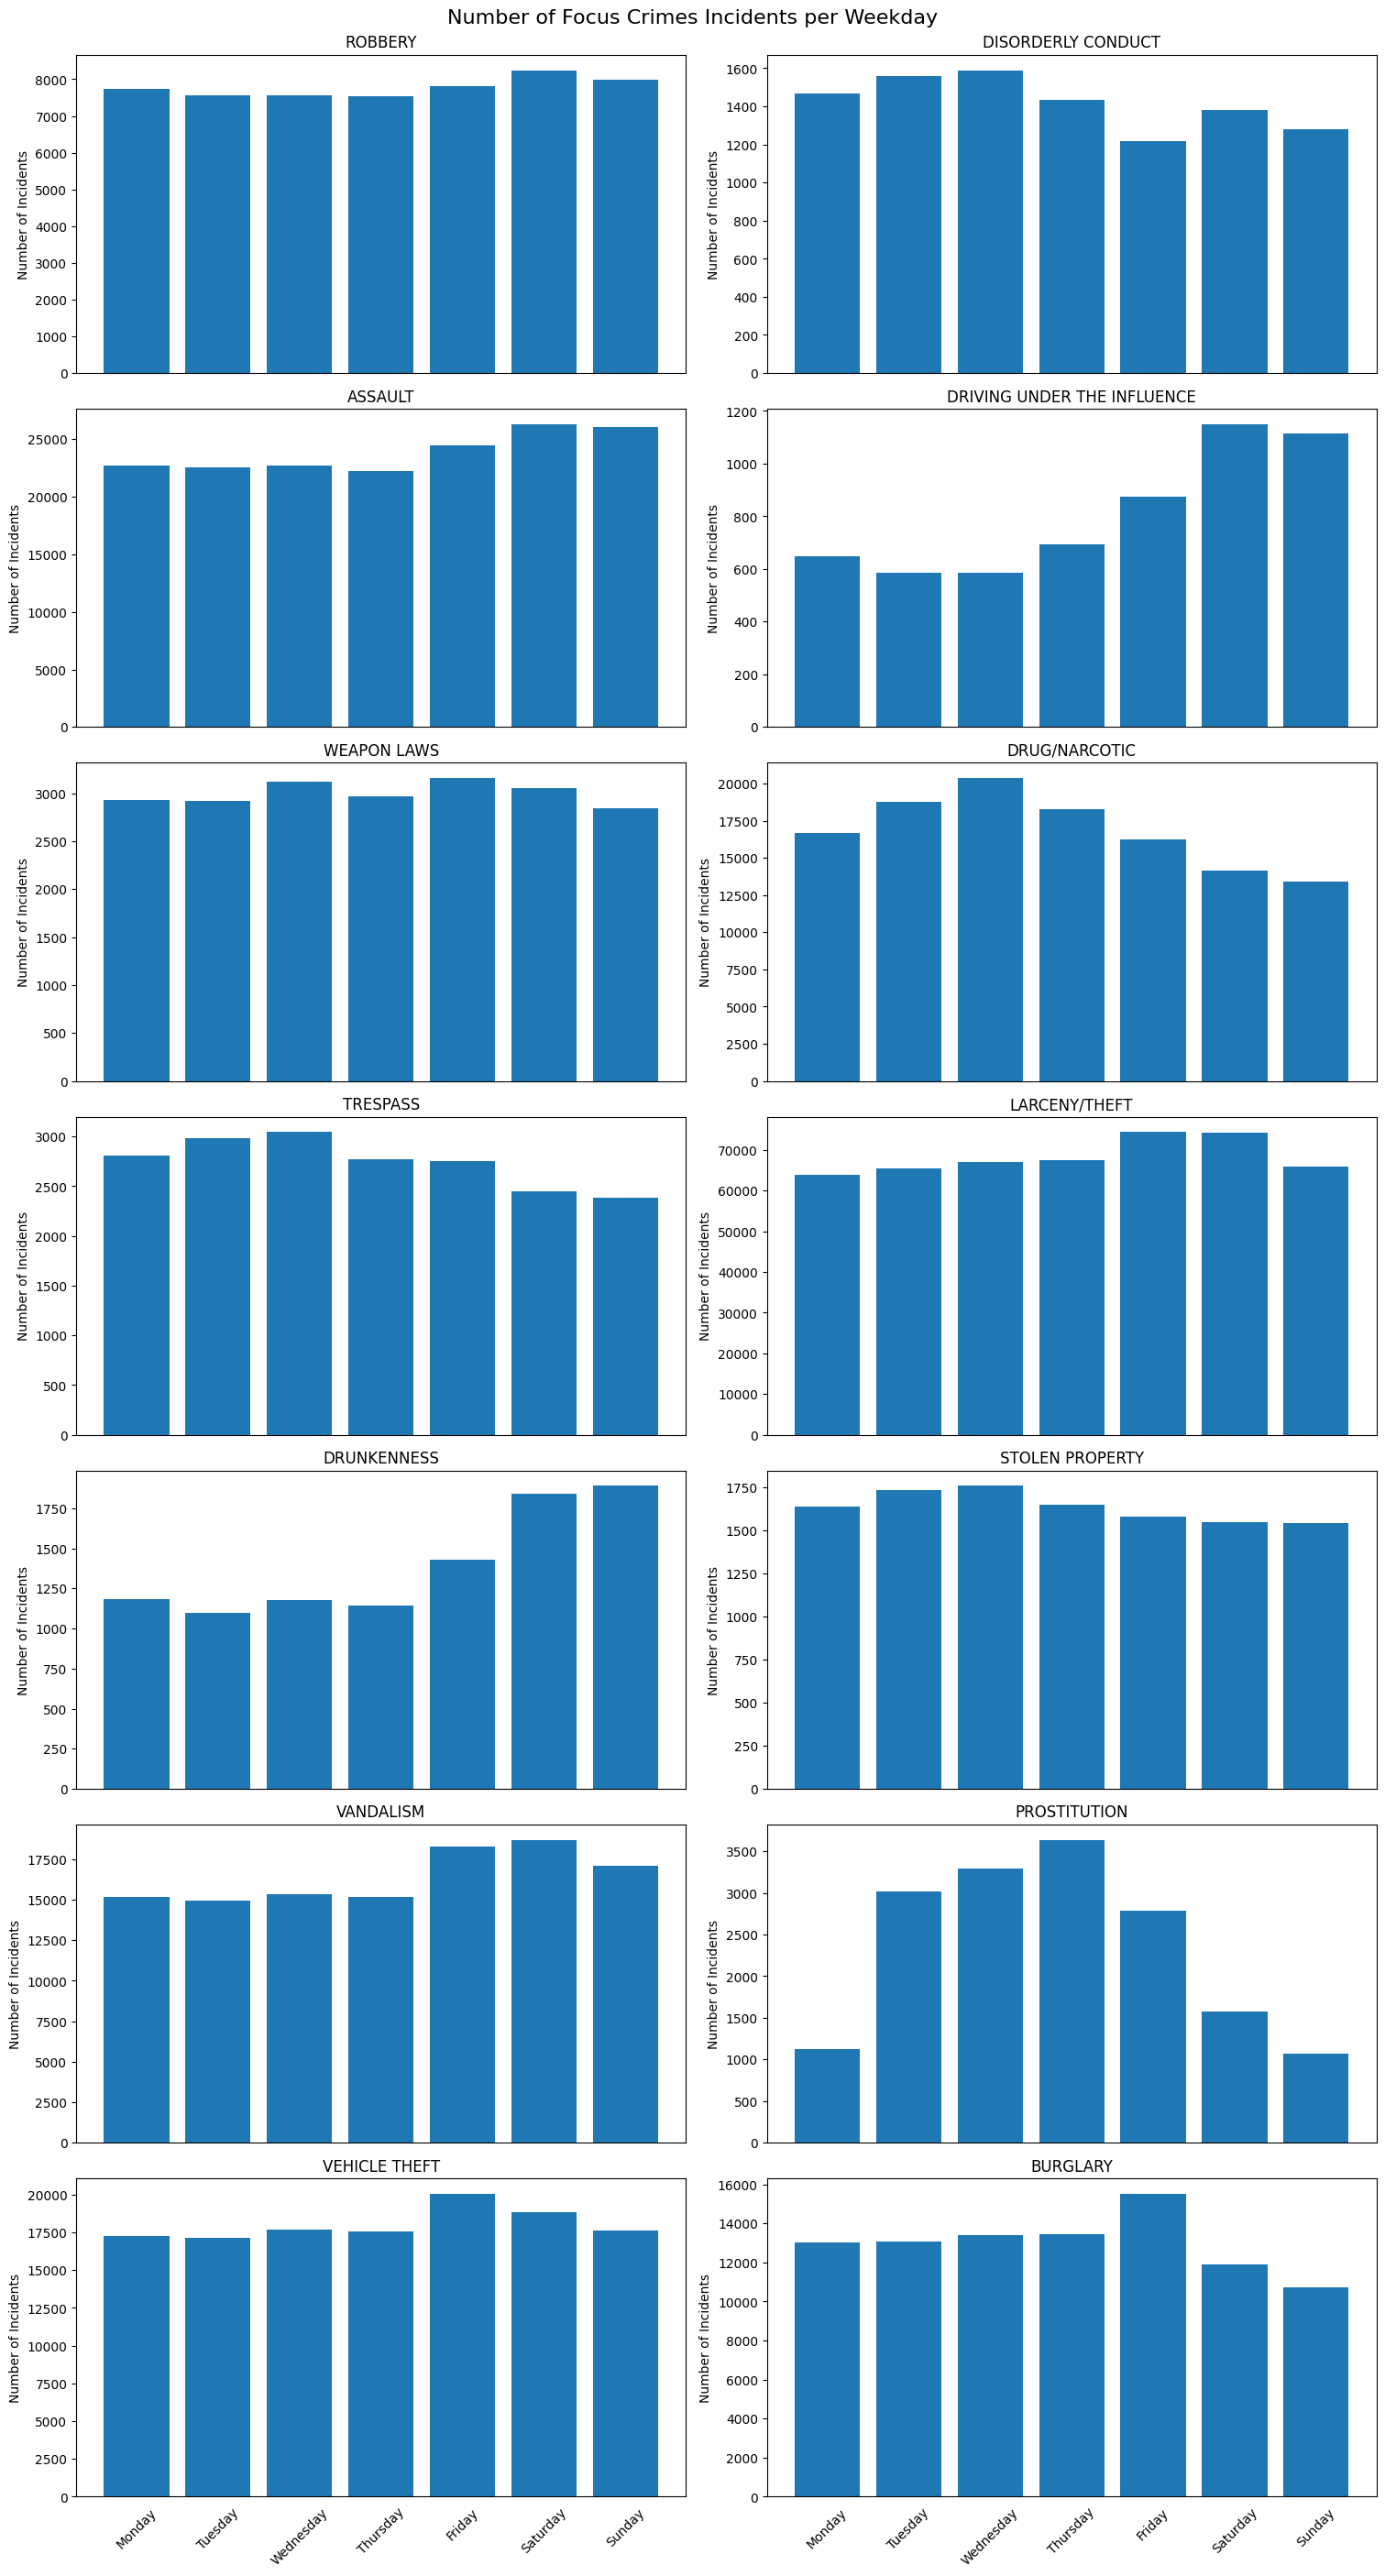

In [43]:
import matplotlib.pyplot as plt

crime_occurrences = data[data['Category'].isin(focuscrimes)].groupby(["Category", "DayOfWeek"]).size().reset_index(name='Count')

fig, axs = plt.subplots(7, 2, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, category in enumerate(focuscrimes):
    ax = axs[i]
    cat_data = crime_occurrences[crime_occurrences['Category'] == category].copy()
    cat_data['DayOfWeek'] = pd.Categorical(cat_data['DayOfWeek'], categories=weekdays, ordered=True)
    cat_data = cat_data.sort_values('DayOfWeek')
    ax.bar(cat_data['DayOfWeek'], cat_data['Count'])
    ax.set_title(category)
    ax.set_ylabel('Number of Incidents')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i // 2 == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Focus Crimes Incidents per Weekday', fontsize=16)
plt.show()

### Plot that captures the development of focus crimes across the months:

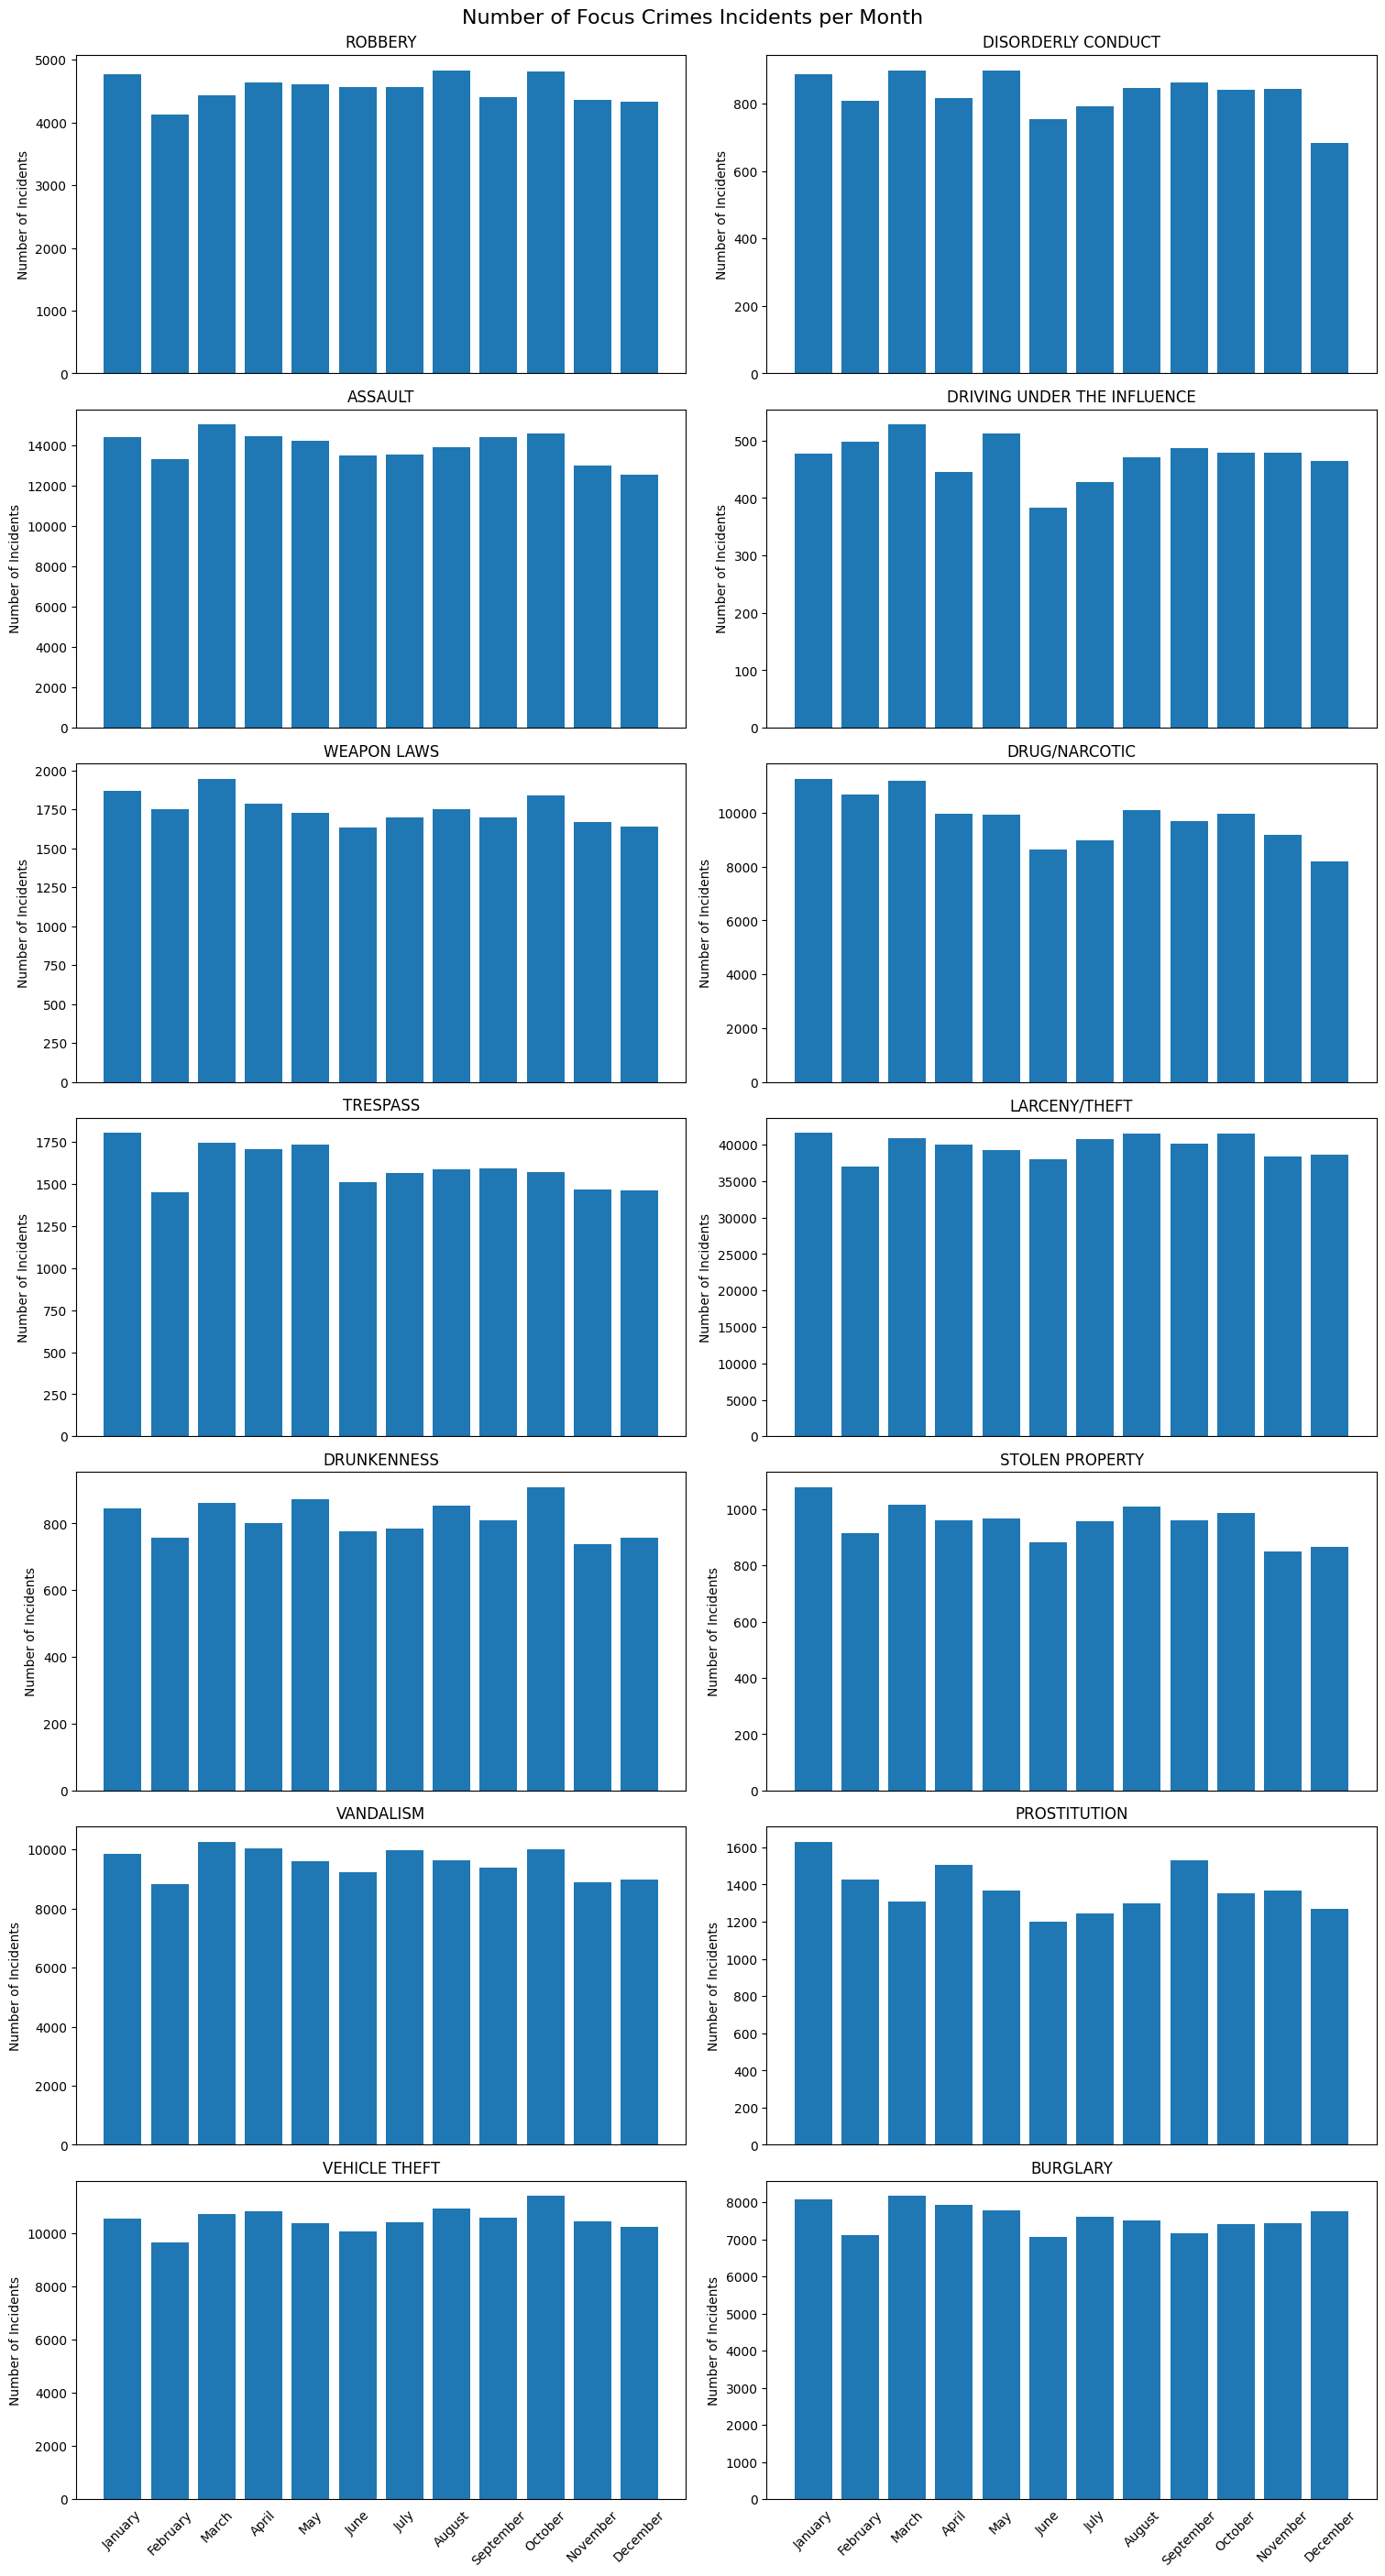

In [44]:
crime_occurrences = (data[data['Category'].isin(focuscrimes)].groupby(['Category', pd.to_datetime(data['Date']).dt.month]).size().reset_index(name='Count'))

fig, axs = plt.subplots(7, 2, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

for i, category in enumerate(focuscrimes):
    ax = axs[i]
    cat_data = crime_occurrences[crime_occurrences['Category'] == category].copy()
    cat_data['Date'] = cat_data['Date'].map(months)
    ax.bar(cat_data['Date'], cat_data['Count'])
    ax.set_title(category)
    ax.set_ylabel('Number of Incidents')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i // 2 == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Focus Crimes Incidents per Month', fontsize=16)
plt.show()

### Plot that captures the development of focus crimes across the 24-hour cycle:

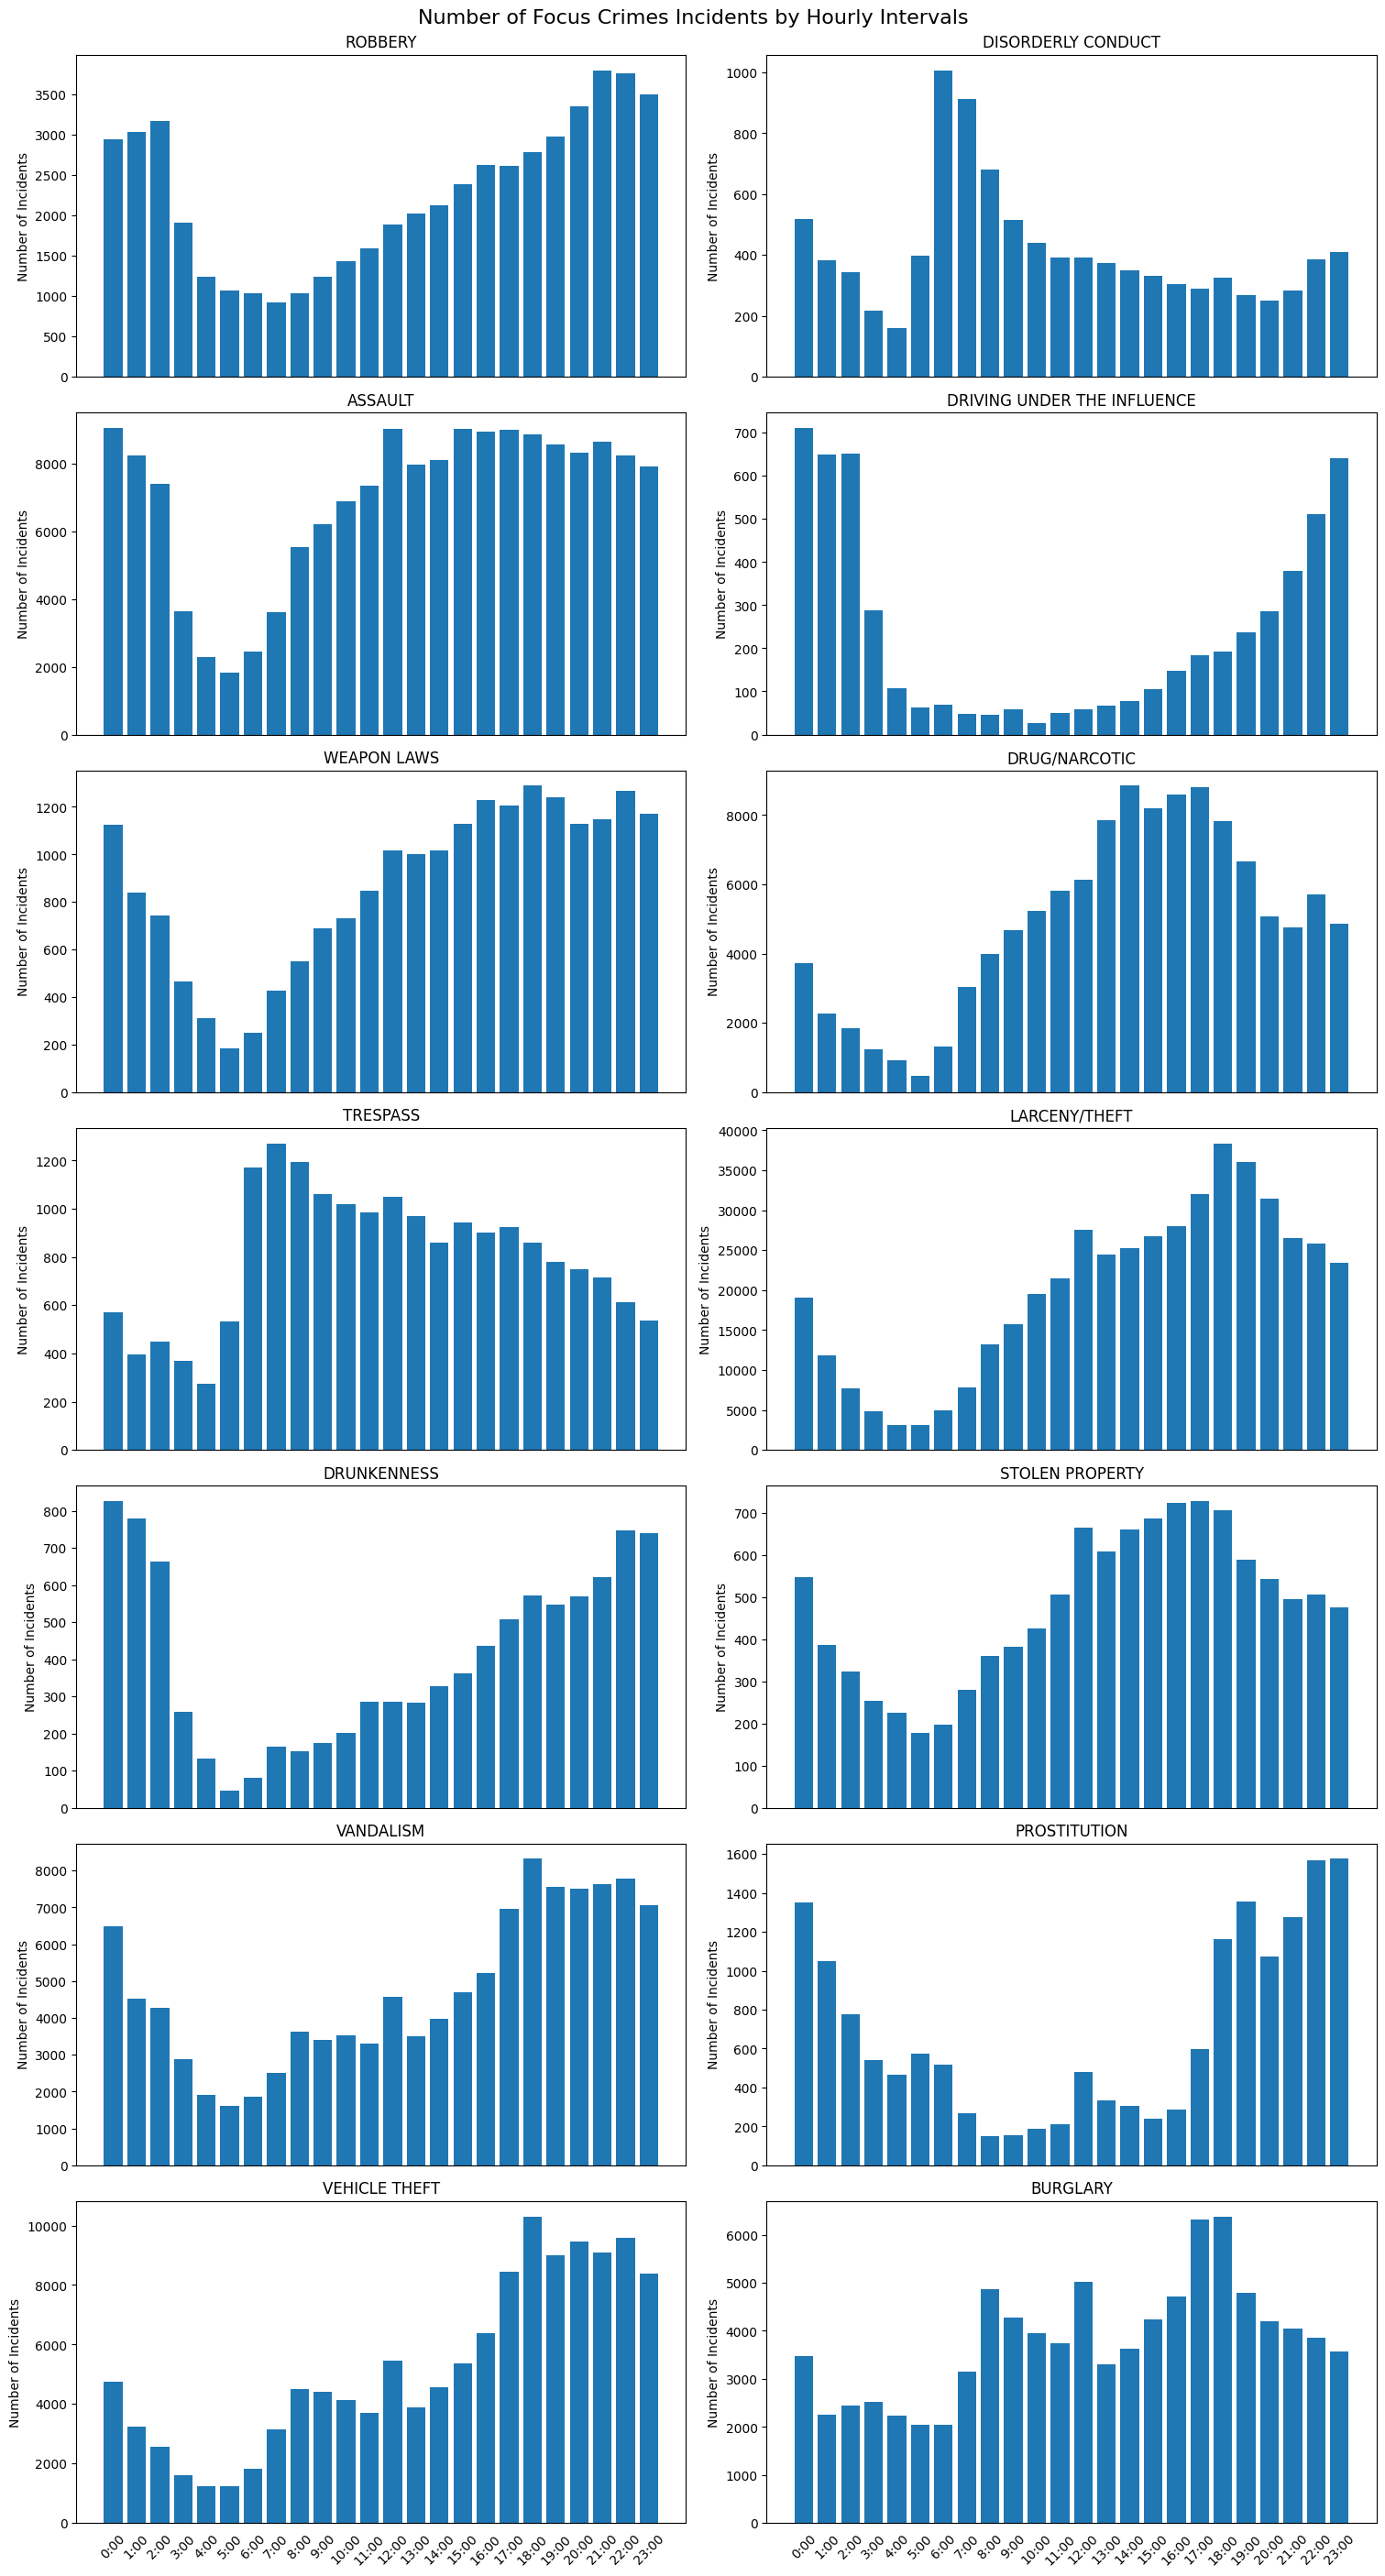

In [46]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
crime_occurrences = (data[data['Category'].isin(focuscrimes)].groupby(['Category', 'Hour']).size().reset_index(name='Count'))

fig, axs = plt.subplots(7, 2, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

for i, category in enumerate(focuscrimes):
    ax = axs[i]
    cat_data = crime_occurrences[crime_occurrences['Category'] == category].sort_values('Hour')
    ax.bar(cat_data['Hour'], cat_data['Count'])
    ax.set_title(category)
    ax.set_ylabel('Number of Incidents')
    ax.set_xticks(range(24))
    ax.set_xticklabels([f'{hour}:00' for hour in range(24)], rotation=90)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i // 2 == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Focus Crimes Incidents by Hourly Intervals', fontsize=16)
plt.show()

### Plot that captures the development of focus crimes across hours of the week:

In [ ]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

hourly_crime_counts = data.groupby(['Category', 'DayOfWeek', 'Hour']).size().reset_index(name='Count')

hourly_crime_counts = hourly_crime_counts[hourly_crime_counts['Category'].isin(focuscrimes)]
hourly_crime_counts.sort_values(by=['DayOfWeek', 'Hour'], inplace=True)

fig, axs = plt.subplots(7, 2, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, category in enumerate(focuscrimes):
    ax = axs[i]
    for day in weekdays:
        # Filter data for the current category and day of the week
        day_data = hourly_crime_counts[(hourly_crime_counts['Category'] == category) & (hourly_crime_counts['DayOfWeek'] == day)]
        
        # Plot the data for this day
        ax.bar(day_data['Hour'], day_data['Count'], label=day)

    ax.set_title(category)
    ax.set_ylabel('Number of Incidents')
    ax.set_xticks(range(24))
    ax.set_xticklabels([f'{hour}:00' for hour in range(24)], rotation=90)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i // 2 == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Crime Incidents by Hour and Day', fontsize=16)
plt.show()